In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('/Users/ptsaravanan/PycharmProjects/flipkart/Apple_iPhone_12_(Blue,_64_GB)_reviews.csv')  # Replace 'your_file.csv' with the path to your CSV file

# Check the first few rows to understand the structure
print(df.head())

# Remove 'READ MORE' from the 'Review' column
df['Review'] = df['Review'].str.replace('READ MORE', '', regex=False).str.strip()

# Optional: Print the cleaned DataFrame to verify the changes
print(df.head())

# Save the cleaned DataFrame to a new CSV file
df.to_csv('Apple_iPhone_12_(Blue,_64_GB)_reviews.csv', index=False)  # Replace 'cleaned_reviews.csv' with your desired output file name


                    Product Name  Rating  \
0  Apple iPhone 12 (Blue, 64 GB)       5   
1  Apple iPhone 12 (Blue, 64 GB)       5   
2  Apple iPhone 12 (Blue, 64 GB)       5   
3  Apple iPhone 12 (Blue, 64 GB)       5   
4  Apple iPhone 12 (Blue, 64 GB)       5   

                                              Review  Likes  Dislikes  
0  The brand is very trustworthy and i got genuin...  27382      2742  
1  Wow superb camera phone Very smooth speed and ...  18419      1832  
2                                   AwesomeREAD MORE   3599       336  
3  Awesome phone   value for money.. Happy with b...  12243      1206  
4                            Awesome CameraREAD MORE   3279       305  
                    Product Name  Rating  \
0  Apple iPhone 12 (Blue, 64 GB)       5   
1  Apple iPhone 12 (Blue, 64 GB)       5   
2  Apple iPhone 12 (Blue, 64 GB)       5   
3  Apple iPhone 12 (Blue, 64 GB)       5   
4  Apple iPhone 12 (Blue, 64 GB)       5   

                                      

In [2]:
import pandas as pd
import re

# List your CSV files
csv_files = ['/Users/ptsaravanan/Apple_iPhone_12_(Blue,_64_GB)_reviews.csv', 
             '/Users/ptsaravanan/PycharmProjects/flipkart/SAMSUNG_Galaxy_S22_5G_(Green,_128_GB)_reviews.csv', 
             '/Users/ptsaravanan/PycharmProjects/flipkart/OnePlus_11R_5G_(Galactic_Silver,_256_GB)_reviews.csv', 
             '/Users/ptsaravanan/PycharmProjects/flipkart/Motorola_Edge_50_Pro_5G_with_125W_Charger_(Moonlight_Pearl,_256_GB)_reviews.csv', 
             '/Users/ptsaravanan/PycharmProjects/flipkart/OPPO_Reno11_Pro_5G_(Rock_Grey,_256_GB)_reviews.csv']

# Combine CSV files into one DataFrame
dfs = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(dfs, ignore_index=True)

# Clean the data
combined_df['Review'] = combined_df['Review'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', ' ', x))

# Save the cleaned combined DataFrame
combined_df.to_csv('combined_cleaned_reviews.csv', index=False)


In [5]:
from textblob import TextBlob

# Define a function to get sentiment score
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
combined_df['Sentiment'] = combined_df['Review'].apply(get_sentiment)

# Save the DataFrame with sentiment scores
combined_df.to_csv('reviews_with_sentiment.csv', index=False)


In [4]:
pip install Textblob

  Obtaining dependency information for Textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 2.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# # Pseudocode for LangChain recommendation integration

# def recommend_products(df):
#     # Group by Product Name and calculate the count of each sentiment
#     sentiment_summary = df.groupby('Product Name')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
    
#     # Example logic: Recommend products with highest proportion of positive reviews
#     recommended_products = sentiment_summary.sort_values(by='Positive', ascending=False).head(5).index.tolist()
    
#     return recommended_products

# # Get recommendations
# recommended_products = recommend_products(combined_df)

# # Save the recommendations
# with open('recommendations.txt', 'w') as f:
#     for product in recommended_products:
#         f.write(f"{product}\n")

# print("Recommended Products:", recommended_products)


In [ ]:
# pip install langchain openai


In [9]:
import pandas as pd

# Load the combined reviews CSV into a DataFrame
combined_df = pd.read_csv('/Users/ptsaravanan/combined_cleaned_reviews.csv')

# Inspect the DataFrame
print(combined_df.head())


                    Product Name  Rating  \
0  Apple iPhone 12 (Blue, 64 GB)     5.0   
1  Apple iPhone 12 (Blue, 64 GB)     5.0   
2  Apple iPhone 12 (Blue, 64 GB)     5.0   
3  Apple iPhone 12 (Blue, 64 GB)     5.0   
4  Apple iPhone 12 (Blue, 64 GB)     5.0   

                                              Review  Likes  Dislikes  
0  The brand is very trustworthy and i got genuin...  27382      2742  
1  Wow superb camera phone Very smooth speed and ...  18419      1832  
2                                            Awesome   3599       336  
3  Awesome phone   value for money.. Happy with b...  12243      1206  
4                                     Awesome Camera   3279       305  


In [4]:
pip install tf-keras


  Obtaining dependency information for tf-keras from https://files.pythonhosted.org/packages/75/aa/cf09f8956d4f276f655b13674e15d8d6015fd832f9689aa9ff2a515781ab/tf_keras-2.16.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 3.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from transformers import pipeline

# Ensure tf_keras is imported to ensure compatibility
import tf_keras

# Initialize sentiment-analysis pipeline
try:
    print("Initializing sentiment-analysis pipeline...")
    sentiment_analysis = pipeline('sentiment-analysis')
    if sentiment_analysis is None:
        raise ValueError("Pipeline initialization returned None. Please check the model and setup.")
    print("Pipeline initialized successfully.")
except Exception as e:
    print(f"Error initializing the pipeline: {e}")
    raise

# Function to perform sentiment analysis on text
def perform_sentiment_analysis(text):
    try:
        print(f"Analyzing sentiment for text: {text[:50]}...")  # Print the first 50 characters for debugging
        result = sentiment_analysis(text)
        return result[0]  # Return the first result as the model outputs a list
    except Exception as e:
        print(f"Error analyzing sentiment: {e}")
        return {"label": "ERROR", "score": 0.0}

# Function to read CSV file and perform sentiment analysis
def analyze_reviews_from_csv(csv_file):
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Ensure 'Review' column exists in your CSV file
    if 'Review' not in df.columns:
        raise ValueError("CSV file must contain a column named 'Review' for sentiment analysis.")
    
    # Apply sentiment analysis to each review in the DataFrame
    print("Starting sentiment analysis on reviews...")
    df['Sentiment_Result'] = df['Review'].apply(lambda x: perform_sentiment_analysis(str(x)))  # Convert to string
    
    # Extract sentiment label and score into separate columns
    df['Sentiment_Label'] = df['Sentiment_Result'].apply(lambda x: x['label'])
    df['Sentiment_Score'] = df['Sentiment_Result'].apply(lambda x: x['score'])

    # Drop the original sentiment result column to keep the DataFrame clean
    df = df.drop(columns=['Sentiment_Result'])

    print("Sentiment analysis completed.")
    return df

# Example usage:
if __name__ == "__main__":
    csv_file_path = '/Users/ptsaravanan/combined_cleaned_reviews.csv'  # Replace with your actual CSV file path

    # Analyze reviews from CSV
    try:
        analyzed_df = analyze_reviews_from_csv(csv_file_path)

        # Print first few rows with sentiment analysis results
        print(analyzed_df.head())

        # Save the DataFrame with sentiment analysis results back to CSV
        analyzed_df.to_csv('reviews_with_sentiment.csv', index=False)
        print("Sentiment analysis results saved to 'reviews_with_sentiment.csv'.")
    except Exception as e:
        print(f"Error processing the CSV file: {e}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Initializing sentiment-analysis pipeline...


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Pipeline initialized successfully.
Starting sentiment analysis on reviews...
Analyzing sentiment for text: The brand is very trustworthy and i got genuine pi...
Analyzing sentiment for text: Wow superb camera phone Very smooth speed and no l...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Awesome phone   value for money.. Happy with batte...
Analyzing sentiment for text: Awesome Camera...
Analyzing sentiment for text: Camera quality is just fabulous. Interface is very...
Analyzing sentiment for text: Best iPhone till date...
Analyzing sentiment for text: Excellent...
Analyzing sentiment for text: Super...
Analyzing sentiment for text: Amazing phone  In love with this phone...
Analyzing sentiment for text: Classic...
Analyzing sentiment for text: Performance is soooo fastEspecially faceid detecti...
Analyzing sentiment for text: This is the value for money phone. For Flipkart:On...
Analyzing sentiment for text: I am very happy with I phone 12Very Nice Product T

Analyzing sentiment for text: Great experience and great support from Flipkart d...
Analyzing sentiment for text: Nice one...
Analyzing sentiment for text: Very nice product...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: One of the best...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Best phone ever, replaced my iPhone 8 with 12   am...
Analyzing sentiment for text: I would use the Old Commercial tagline of Apple to...
Analyzing sentiment for text: Green colour is charming and priceless    No weigh...
Analyzing sentiment for text: Fantastic & unbearable...
Analyzing sentiment for text: Loving it...
Analyzing sentiment for text: Amazing phone!! Worth it!...
Analyzing sentiment for text: Wonderful camera...
Analyzing sentiment for text: Greatest forever...
Analyzing sentiment for text: Awesome. Extremely happy with the purchase. Kudos ...
Analyzing sentiment for text: One of the best smartphone ever....
Analyzing sentiment for text: One o

Analyzing sentiment for text: Overall a good experience. Takes sometime to get u...
Analyzing sentiment for text: Got a genuine product. Checked the serial number o...
Analyzing sentiment for text: Well always being user of Apple devices doesn t ma...
Analyzing sentiment for text: I was upgraded from iPhone X and it was great expe...
Analyzing sentiment for text: Now it's around 16 days using iphone 12, and the r...
Analyzing sentiment for text: Super love you I phone 12...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Very good product. Received in perfect condition f...
Analyzing sentiment for text: Premium look..just go .without any doubt.superb ca...
Analyzing sentiment for text: Stunning Phone from IPhone at Stunning price.1. Go...
Analyzing sentiment for text: Awsm...
Analyzing sentiment for text: Its just awesome...
Analyzing sentiment for text: Product was fine . No issue ....
Analyzing sentiment for text: A simple ,elegant and functional iPhone . Very hap

Analyzing sentiment for text: Nice camera nice design ios is extremely fast as e...
Analyzing sentiment for text: I always bought a android flagship device but i wa...
Analyzing sentiment for text: camera is very nice and performance is no word nic...
Analyzing sentiment for text: Amazing:)...
Analyzing sentiment for text: As switched from an android to ios  it's worth upg...
Analyzing sentiment for text: Thank u so much such as a lovely phone.The battery...
Analyzing sentiment for text: This is my first iPhone after being an android guy...
Analyzing sentiment for text: This is my first Apple product and obviously I was...
Analyzing sentiment for text: iPhone is all time the best smartphone phone...
Analyzing sentiment for text: It Worth all the praises it gets, great phone with...
Analyzing sentiment for text: I got this 128 GB iphone 12 under 30 hours after o...
Analyzing sentiment for text: Just Go for it...
Analyzing sentiment for text: Killer performance.love the way it is.Shiftin

Token indices sequence length is longer than the specified maximum sequence length for this model (518 > 512). Running this sequence through the model will result in indexing errors


Analyzing sentiment for text: 100% original product  Good quality product Value ...
Analyzing sentiment for text: Awesome phone. Display is awesome fully true colou...
Analyzing sentiment for text: Finally got the most awaited iPhone 12 with favour...
Analyzing sentiment for text: I am satisfied and happy...
Analyzing sentiment for text: It's an apple so don't need to review. Always wort...
Analyzing sentiment for text: Loved it...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Its like dream come true for me, Moved from oneplu...
Analyzing sentiment for text: Using apple after 3 years last I was using 6plus a...
Analyzing sentiment for text: Over a Decade long android user switching to the i...
Error analyzing sentiment: The size of tensor a (518) must match the size of tensor b (512) at non-singleton dimension 1
Analyzing sentiment for text: Super...
Analyzing sentiment for text: Very nice n premium look...
Analyzing sentiment for text: Always prefer Only Product

Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Osm...
Analyzing sentiment for text: It was a fantastic purchase. Based on initial revi...
Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Fully satisfied with every feature and look of the...
Analyzing sentiment for text: Great deal Loved it...
Analyzing sentiment for text: Excellent...
Analyzing sentiment for text: The beast in this price range! No lag in BGMI and ...
Analyzing sentiment for text: Highly satisfied with the delivered product Apple ...
Analyzing sentiment for text: Loving the experience,absolutely fantastic.Pros: G...
Analyzing sentiment for text: Bought it for 49k approximately on big billion day...
Analyzing sentiment for text: Just awesome...
Analyzing sentiment for text: Good looking nice camera and features . Storge cou...
Analyzing sentiment for text: Awesome camera quality...
Analyzing sentiment for text: Awesome performance ..Awesome camera...Battery lif...
A

Analyzing sentiment for text: Nice Product...
Analyzing sentiment for text: Classy .. so happy with the iPhone 12 in love with...
Analyzing sentiment for text: Excellent!...
Analyzing sentiment for text: Just wonderful...
Analyzing sentiment for text: Phone is nice. Battery is only 2800 mah which need...
Analyzing sentiment for text: Super se vi upor iPhone 12...
Analyzing sentiment for text: Nice phone. Been using jt for past 2 years. During...
Analyzing sentiment for text: review after 1 year of heavy usage... camera is aw...
Analyzing sentiment for text: Best quality...
Analyzing sentiment for text: Amazing...
Analyzing sentiment for text: Excellent experience...
Analyzing sentiment for text: Satisfied...
Analyzing sentiment for text: Very Nice phoneMy first iphoneApple iphone 12(256 ...
Analyzing sentiment for text: Really a nice gadget. Last time i had bought an ip...
Analyzing sentiment for text: Great experience...
Analyzing sentiment for text: Steve jobs was better but Tim Cook

Analyzing sentiment for text: Loving It...
Analyzing sentiment for text: Best phone...
Analyzing sentiment for text: My second iPhone after XR get stolen overall good ...
Analyzing sentiment for text: Phone is great but price should be some less....
Analyzing sentiment for text: A beast totally a beast, This is why A iPhone is d...
Analyzing sentiment for text: Ultra fast speed with a perfect camera and ultimat...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Finally a complete phone by AppleThis phone will d...
Analyzing sentiment for text: Fees like iPhone 5 has grown up to be an adult. 8 ...
Analyzing sentiment for text: An apple fan, I find iPhone 12 light, easier to us...
Analyzing sentiment for text: Its my 2nd iPhone...
Analyzing sentiment for text: Nice but battry performance was very bad but nice ...
Analyzing sentiment for text: When I was buying a new iPhone, I was very confuse...
Analyzing sentiment for text: Very nice...
Analyzing sentiment for text: 

Analyzing sentiment for text: Performance-Beast(Beat every android flagship any ...
Analyzing sentiment for text: Super...
Analyzing sentiment for text: Best Value for money phone under 40K...
Analyzing sentiment for text: Money worth...
Analyzing sentiment for text: recommended...
Analyzing sentiment for text: The most liked thing in this mobile is it's camera...
Analyzing sentiment for text: Got the 128 GB version at 56K. The experience is a...
Analyzing sentiment for text: It's just amazing loved the deal and the iPhone...
Analyzing sentiment for text: Excellent phone  Loved it...
Analyzing sentiment for text: I have received same mobile as shown on picture. T...
Analyzing sentiment for text: To much good...
Analyzing sentiment for text: Amazing device. Fortunately i didn't receive a sto...
Analyzing sentiment for text: Review after usage of 2 months.One of the best app...
Analyzing sentiment for text: cery nice phone...
Analyzing sentiment for text: Fabulous product...
Analyzing se

Analyzing sentiment for text: Very nice and good quality and orginal APPLE produ...
Analyzing sentiment for text: Best...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Amazing...
Analyzing sentiment for text: Good phone.. my first buy of iphone. 60 hz for scr...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: I have been using it now for about an year, no pro...
Analyzing sentiment for text: Battery backup is not as good as iphone 13. bt its...
Analyzing sentiment for text: Nice phone and nice camera...
Analyzing sentiment for text: I love this   my fav iPhone 12...
Analyzing sentiment for text: Amazing mobile...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: It s a nice phone with excellent performance....
Analyzing sentiment for text: Osm Product...
Analyzing sentiment for text: Overall good experience after iphone se2020...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Display and  camera are u

Analyzing sentiment for text: I love it as it feels light weight in comparison t...
Analyzing sentiment for text: Its iphone 12 what rest I have to say...
Analyzing sentiment for text: Awesome 12...
Analyzing sentiment for text: IPhone 12 is the perfect iPhone I would say. Be it...
Analyzing sentiment for text: I got only 1 iPhone here is showing 12 but they gi...
Analyzing sentiment for text: Amazing deal from Flipkart  display is amazing to ...
Analyzing sentiment for text: Superb performance, good battery life(runs more th...
Analyzing sentiment for text: Great Device Awesome performance...
Analyzing sentiment for text: Awesome phone IPhone 12...
Analyzing sentiment for text: Superb in all specifications...
Analyzing sentiment for text: Great mobile n reasonable price...
Analyzing sentiment for text: I love Flipkart...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Best iPhone...
Analyzing sentiment for text: Review after

Analyzing sentiment for text: Loved it...
Analyzing sentiment for text: It's good phone , thanks Flipkart...
Analyzing sentiment for text: Amazing product. There is nothing like it....
Analyzing sentiment for text: Best phone in this price...
Analyzing sentiment for text: Great Product from Apple. Go for iphone 12 however...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Reall awsm product...
Analyzing sentiment for text: I am soo in love with the user experience & camera...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: I've switched to ios from oneplus and iPhone 12s c...
Analyzing sentiment for text: Very handy and poweful device only facing some  he...
Analyzing sentiment for text: Fully satisfied with camera and performance...
Analyzing sentiment for text: Most important pros of this mobile is the "Purple ...
Analyzing sentiment for text: Good deal and genuine product  I m happy...
Analyzing sentiment for text: Awesome device, Butter

Analyzing sentiment for text: Excellent display and camera...
Analyzing sentiment for text: First time using iphone.... Amazing experiences so...
Analyzing sentiment for text: I will be honest that I was skeptical about orderi...
Analyzing sentiment for text: Upgraded me from iPhone XR. It feels like an upgra...
Analyzing sentiment for text: Amazing phone with good display and fabulous camer...
Analyzing sentiment for text: This is my 5th since 2013. The Biggest enhancement...
Analyzing sentiment for text: black color is love...
Analyzing sentiment for text: The phone is awesome but too highly priced because...
Analyzing sentiment for text: Overall good phone except battery...
Analyzing sentiment for text: 100 n 100% genuine product...
Analyzing sentiment for text: Very good deal found from Flipkart thanks very hap...
Analyzing sentiment for text: Amazing Just Wow...
Analyzing sentiment for text: Excellent looking and durable mobile...
Analyzing sentiment for text: The phone is good bu

Analyzing sentiment for text: Its my first apple phone and am very hppy wid it. ...
Analyzing sentiment for text: Good except battery backup...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Nice to have itNice to own it...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Overall awesome product...1. My first ios experien...
Analyzing sentiment for text: Camera quality...
Analyzing sentiment for text: Awesome device .Buttersmooth experiance with this ...
Analyzing sentiment for text: at the cost of 53k it s worth buying...
Analyzing sentiment for text: Genuine product. Been using from last 2 months. Wo...
Analyzing sentiment for text: No value for money...
Analyzing sentiment for text: Its all about moneyMore sugar more sweet...
Analyzing sentiment for text: Absolutely stunning phone  loved it...
Analyzing sentiment for text: Found cardbox box opened and iPhone box not sealed...
Analyzing sentiment for text: Needless to say anything about t

Analyzing sentiment for text: I had been a hard core Samsung fan for years now a...
Analyzing sentiment for text: Loving the switch from an Android. Very smooth to ...
Analyzing sentiment for text: Genuine Product.Thanks for the fast delivery flipk...
Analyzing sentiment for text: I loved it...
Analyzing sentiment for text: simply awesome........
Analyzing sentiment for text: best phone...
Analyzing sentiment for text: No comparison when it comes to iPhone. So far iPho...
Analyzing sentiment for text: How can one complain about iPhone performance. As ...
Analyzing sentiment for text: Black beast amazing mobile...
Analyzing sentiment for text: The phone is fine for a professional use not heavy...
Analyzing sentiment for text: Worth money...
Analyzing sentiment for text: Value for money.....
Analyzing sentiment for text: If u want to buy phone to not much work it worth.I...
Analyzing sentiment for text: Its an Iphone Obviously it will be awsome......
Analyzing sentiment for text: Good...

Analyzing sentiment for text: Amazing product...
Analyzing sentiment for text: super mobile...
Analyzing sentiment for text: Magnificent...
Analyzing sentiment for text: Very good phone and camera and fucher...
Analyzing sentiment for text: battery life 96 % and overheating problem....
Analyzing sentiment for text: Wow! This is Good Hand Set I ever Used to have...
Analyzing sentiment for text: Very...
Analyzing sentiment for text: Nis love you felipkad...
Analyzing sentiment for text: Outstanding Performance by camera and iPhone 12 ph...
Analyzing sentiment for text: Gud...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: nice...
Analyzing sentiment for text: good...
Analyzing sentiment for text: Very bad product...
Analyzing sentiment for text: Ok...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Delevery phone  Power of mobile not open not worki...
Analyzing sentiment for text: Love it. Good...
Analyzing sentiment for text: Superb Mobile, Nice 

Analyzing sentiment for text: too good mobile...
Analyzing sentiment for text: Gud...
Analyzing sentiment for text: Very good to see you...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: I bought this mobile a month ago, everything was p...
Analyzing sentiment for text: Everything is perfect!...
Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Camera is not upto mark.Got better pics with other...
Analyzing sentiment for text: Sup...
Analyzing sentiment for text: waste phone in 2023...
Analyzing sentiment for text: I love this mobile...
Analyzing sentiment for text: Nothing to say. Amezing experience....
Analyzing sentiment for text: Osm pictures...
Analyzing sentiment for text: Decent camera but the i phone 12 performance still...
Analyzing sentiment for text: It's good...
Analyzing sentiment for text: It's good...
Analyzing sentiment for text: Using by phone and happy...
Analyzing sentiment for text: Very nice product I am really verry h

Analyzing sentiment for text: Hitting issues...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Very good super Product...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Good product...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Best mobile...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: nic...
Analyzing sentiment for text: Superb Smartphone...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Not like products...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Nice  Product...
Analyzing sentiment for text: Awesome camera, picturequality. While clicking man...
Analyzing sentiment for text: Incredible camera...
Analyzing sentiment for text: My dream is come to reality so and I am so happy f...
Analyzing sentiment for text: I love the product from Flipkart and thank you...
Analyzing sentiment for text: Good experience...
Analyzing sentiment for text: Power f

Analyzing sentiment for text: After a week Camera 5Battery. 3.5Performance 4Disp...
Analyzing sentiment for text: Mobile temperature   high...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Nice rodu...
Analyzing sentiment for text: Ok...
Analyzing sentiment for text: Best camera...
Analyzing sentiment for text: Just Osm...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Camera is amazing...
Analyzing sentiment for text: Camara...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Best...
Analyzing sentiment for text: Very nice...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Super   phone....
Analyzing sentiment for text: Love u apple phone super...
Analyzing sentiment for text: Good product...
Analyzing sentiment for text: Apple is apple...
Analyzing sentiment for text: Good apple is apple...
Analyzing sentiment for text: Nicee...
Analyzing sentiment for text: Good ph

Analyzing sentiment for text: good...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Nice bad product...
Analyzing sentiment for text: Iphone 12  successfully delivered and good experie...
Analyzing sentiment for text: Very Nice Product......
Analyzing sentiment for text: After receiving the phone, it worked for 10 minute...
Analyzing sentiment for text: Amazing product...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: I have been using the iphone 12 more then 10 days ...
Analyzing sentiment for text: Fan of this...
Analyzing sentiment for text: As expected...
Analyzing sentiment for text: Nice phone.....
Analyzing sentiment for text: iPhone 12 is a good  iPhone is a one of the best i...
Analyzing sentiment for text: Loved it...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Osmmmmmm...
Analyzing sentiment for text: Osm mobile...
Analyzing sentiment for text: Good...
Analyzing s

Analyzing sentiment for text: Camera And Display Quality is Good . Sound Quality...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Outstanding product...
Analyzing sentiment for text: Best product...
Analyzing sentiment for text: Amazing phone...
Analyzing sentiment for text: Excellent Mobail...
Analyzing sentiment for text: iPhone is really good black colour is the classic ...
Analyzing sentiment for text: I love filpkart..ncy product  Value for money prod...
Analyzing sentiment for text: Very good iphone good quality thanks filpkart...
Analyzing sentiment for text: Super cool...
Analyzing sentiment for text: Excellent...
Analyzing sentiment for text: Wow naice  camera . good looking iphone 12  online...
Analyzing sentiment for text: Amazing...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Must Buy. ......
Analyzing sentiment for text: Osm...
Analyzing sentiment fo

Analyzing sentiment for text: I love this phone....
Analyzing sentiment for text: Very nice product...
Analyzing sentiment for text: AWESOME PRODUCT...
Analyzing sentiment for text: Can see why my younger brother can open the face l...
Analyzing sentiment for text: The iPhone 12 is still a solid phone taking great ...
Analyzing sentiment for text: Awesome Phone. Best experience. Very Smooth to ope...
Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Just Wow...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Battery life is not good....
Analyzing sentiment for text: God...
Analyzing sentiment for text: Super...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Phone is too good, earlier use 6s and now this...a...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Good...
Analy

Analyzing sentiment for text: Product is very good ......and flipcart srvices ve...
Analyzing sentiment for text: I phone quality is here...
Analyzing sentiment for text: Wow...
Analyzing sentiment for text: Supar...
Analyzing sentiment for text: Sexy...
Analyzing sentiment for text: Good mobile...
Analyzing sentiment for text: Iphone is iphone.. No need to write a review...
Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Good product...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Best mobile...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Product is not up to the mark...
Analyzing sentiment for text: Great...
Analyzing sentiment for text: Great...
Analyzing sentiment for text: Apple I phone is black I like...
Analyzing sentiment for text: best even in 2023...
Analyzing sentiment for text: Light weight iPhone with best display and camera...
Analyzing sentiment for text: Good phone...
Analyzing sentiment for text

Analyzing sentiment for text: Best ever phone i used its processor was amazing f...
Analyzing sentiment for text: The product was in good condition when delivered, ...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Not giving charger is badly affecting battery life...
Analyzing sentiment for text: iphone is the best...
Analyzing sentiment for text: Charging Very slow...
Analyzing sentiment for text: Excellent ConditionThanks Flipkart...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: It was good guys u can order it.....
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Working seamlessly after 1 year also...
Analyzing sentiment for text: Battery draining issue. Can't survive for 12 hrs e...
Analyzing sentiment for text: mindblowing...
Analyzing sentiment for text: Noice!...
Analyzing sentiment for text: Good phone...
Analyzing sentiment for text: Ultimate  product...
Analyzing sen

Analyzing sentiment for text: Good...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Switching from android to iOS is an amazing experi...
Analyzing sentiment for text: Nice product fully satisfying performance.Thought ...
Analyzing sentiment for text: I have been used from last 15 days iPhone is reall...
Analyzing sentiment for text: Very Nice thanks Flipkart...
Analyzing sentiment for text: I ordered this phone for a birthday gift the birth...
Analyzing sentiment for text: Awesome look...
Analyzing sentiment for text: Love...
Analyzing sentiment for text: Fantastic and excellent performance...
Analyzing sentiment for text: It s really good...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Great phone...
Analyzing sentiment for text: All thing is good in apple products accept their b...
Analyzing sentiment for text: Pros - DisplayCameraProcesssing FastDimension is

Analyzing sentiment for text: Battery life must be improved !!Camera is professi...
Analyzing sentiment for text: I Just Loved It......Tnq Flipkart...
Analyzing sentiment for text: best...
Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Best phone...
Analyzing sentiment for text: Its My 1st i phoneNo one can beat i phone sagaJust...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Awesome phone...
Analyzing sentiment for text: Battery could have been great. It s good but for a...
Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Should improve the battery...
Analyzing sentiment for text: Good product. Worth for money....
Analyzing sentiment for text: Superb purchase..thanks Flipkart...
Analyzing sentiment for text: Amazing...
Analyzing sentiment for text: Nice phone. I think very best Phone...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Best Product...
Analyzing sentiment for text: Amazi

Analyzing sentiment for text: I love it...
Analyzing sentiment for text: Waste of money...
Analyzing sentiment for text: Ios is always best in the row...
Analyzing sentiment for text: Everyone one should be purchased. because Apple   ...
Analyzing sentiment for text: Not satisfied...
Analyzing sentiment for text: Quality product...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: mobile hang...
Analyzing sentiment for text: Amazing. Enjoying it very much....
Analyzing sentiment for text: Jus go for.. you will love it...
Analyzing sentiment for text: Iphone 12 is incredible...
Analyzing sentiment for text: Worst mobile never buy a phone or any costly produ...
Analyzing sentiment for text: Every paisa I spent on this product worth its valu...
Analyzing sentiment for text: love...
Analyzing sentiment for text: As per brand the product is good..camera quality i...
Analyzing sentiment for text: Ba

Analyzing sentiment for text: I love this product considering all the previous v...
Analyzing sentiment for text: Not as accepted...
Analyzing sentiment for text: loved it...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Very good as expected ....
Analyzing sentiment for text: Awesome  Great experience Battery optimization is ...
Analyzing sentiment for text: Heat up   so muchVery big problemWhile charging an...
Analyzing sentiment for text: Good product...
Analyzing sentiment for text: Most compact And powerful phone till time...
Analyzing sentiment for text: Value of money...
Analyzing sentiment for text: Just awesome...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Massive profuct...
Analyzing sentiment for text: Wonderful powerful phone I love it...
Analyzing sentiment for text: value of money...
Analyzing sentiment for text: Using...
Analyzing sentiment for text: Extremely speedy delivery. First class product. Bu...
Analyzing sentimen

Analyzing sentiment for text: Excellent i phone...
Analyzing sentiment for text: Recommend...
Analyzing sentiment for text: Useful hai...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: good product. thank u flipkart...
Analyzing sentiment for text: Superbb...
Analyzing sentiment for text: Apple always rocks...
Analyzing sentiment for text: vvv good...
Analyzing sentiment for text: Loved it  ....
Analyzing sentiment for text: Best ever dear I got...
Analyzing sentiment for text: Worth the price...
Analyzing sentiment for text: Superb...
Analyzing sentiment for text: Excellent performance.......
Analyzing sentiment for text: Got for good price, around 10K lesser than outside...
Analyzing sentiment for text: It s an excellent device....
Analyzing sentiment for text: Phone  Apple  12 wonderful...
Analyzing sentiment for text: Excellent mob n good camera quality...
Analyzing sentiment for text: A great phone with great camera quality. Loved it ...
Analyzing sentiment fo

Analyzing sentiment for text: Love u Flipkart...
Analyzing sentiment for text: loved...
Analyzing sentiment for text: Best...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Not good...
Analyzing sentiment for text: Good Phone...
Analyzing sentiment for text: price high to the sky theee no 3.5 mm jack ok but ...
Analyzing sentiment for text: Best mobile...
Analyzing sentiment for text: Good one...
Analyzing sentiment for text: It s really worth buying i phone 12 at the price o...
Analyzing sentiment for text: Excellent phone....
Analyzing sentiment for text: This phone is amazing...
Analyzing sentiment for text: Thank you so much...
Analyzing sentiment for text: awesome...
Analyzing sentiment for text: Great product , suggested go for it...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Complaint within a week...
Analyzing sentiment for text: Ok product...
Analyzing sentiment for text: Amazing purchase done on diwali end big billion Lo...
Analyz

Analyzing sentiment for text: It is worth you will never regret....
Analyzing sentiment for text: Very good product...
Analyzing sentiment for text: I have ordered in Diwali sell, i love this product...
Analyzing sentiment for text: Excellent phone. Delivery got delayed....
Analyzing sentiment for text: One of the best phone...
Analyzing sentiment for text: Awesome purchase, nothing to complain about.Only o...
Analyzing sentiment for text: not economical...
Analyzing sentiment for text: Value for money...
Analyzing sentiment for text: Excellent Mobile, Loved it...
Analyzing sentiment for text: Very nice...
Analyzing sentiment for text: I have received a phone but after using 10 days ha...
Analyzing sentiment for text: Worth of price, battery back up is too good...
Analyzing sentiment for text: Genuine product...
Analyzing sentiment for text: Apple awesome...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Amazing phone, genuine. This is my second iphone 1...
Anal

Analyzing sentiment for text: Loving It....
Analyzing sentiment for text: Just for Brand sake u need to Buy . Android is the...
Analyzing sentiment for text: Super...
Analyzing sentiment for text: Brand...
Analyzing sentiment for text: Best mobile...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: good Sjv...
Analyzing sentiment for text: Thank you flipcart.........
Analyzing sentiment for text: Excellent product, quick delivery...
Analyzing sentiment for text: Great product....
Analyzing sentiment for text: Good product I m so happy...
Analyzing sentiment for text: Very nice and comfortable...
Analyzing sentiment for text: Excellent...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Outstanding...
Analyzing sentiment for text: Awesome purchase. Display quality is superb and pe...
Analyzing sentiment for text: Okay...
Analyzing sentiment for text: Nice phone...
Analyzing sentiment for text: No words to explain the quality it s Awesome in ev...

Analyzing sentiment for text: Good...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: I love ittttt!!!...
Analyzing sentiment for text: Best machine I ever own...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Best...
Analyzing sentiment for text: Osm phone and I love to make a reel with i phone...
Analyzing sentiment for text: Good product...
Analyzing sentiment for text: Excellent...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: I like it...
Analyzing sentiment for text: Great...
Analyzing sentiment for text: Excellent...
Analyzing sentiment for text: Good product...
Analyzing sentiment for text: Superb...
Analyzing sentiment for text: Good phone if getting under 45k. Go for 128 GB, if...
Analyzing sentiment for text: It was a awesome product...
Analyzing sentiment for text: Getting problems from 1st day .. not charging prop...
Analyzing sentiment for text: Excellent...
Analyzing sentiment for text: Awesome Product..

Analyzing sentiment for text: Worth the money...
Analyzing sentiment for text: Best in this price range....
Analyzing sentiment for text: Super se uper...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Worth the money...
Analyzing sentiment for text: There is some problem while receiving calls....
Analyzing sentiment for text: Its  good...
Analyzing sentiment for text: Camera Quality is just satisfactory( Some segments...
Analyzing sentiment for text: It is really amazing. Performance and look is awes...
Analyzing sentiment for text: Awesome phone very good quality...
Analyzing sentiment for text: Good buy...
Analyzing sentiment for text: Simply priceless ....
Analyzing sentiment for text: Using this phone from last 3 months. This phone is...
Analyzing sentiment for text: Overall it s good purchase...
Analyzing sentiment for text: Excellent product and genuine no complain about th...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Premium a

Analyzing sentiment for text: Nice phone to have, but currently rate is high in ...
Analyzing sentiment for text: bad...
Analyzing sentiment for text: Super very super...
Analyzing sentiment for text: Value for money...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Best budget iphone in apple....
Analyzing sentiment for text: Superb Retina display...
Analyzing sentiment for text: Owsm camera...
Analyzing sentiment for text: Nice packing and fastest delivery....
Analyzing sentiment for text: Expensive but its APPLE Product. So A Big yes to I...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: So satisfied...
Analyzing sentiment for text: Just so good! Absolutely loving the dolby sound!...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Gud...
Analyzing sentiment for text: Very good job...
Analyzing sentiment for text: Nice phone...
Analyzing sentiment for text: Best...
Analyzing senti

Analyzing sentiment for text: Competitive price only in Flipkart and appreciate ...
Analyzing sentiment for text: Fantastic product. Loved it...
Analyzing sentiment for text: Best phone in this price...
Analyzing sentiment for text: It s a sturdy phone with long battery life and goo...
Analyzing sentiment for text: Nice mobile...
Analyzing sentiment for text: Worst...
Analyzing sentiment for text: Awesome phone. Go for it without a Dought . 128 gb...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Brilliant product must buy...
Analyzing sentiment for text: Loved it...
Analyzing sentiment for text: Good product. No issues till date...
Analyzing sentiment for text: Love it...
Analyzing sentiment for text: Was little concernd over online purchase but final...
Analyzing sentiment for text: Awesome performance nice everything.....
Analyzing sentiment for text: Moved back on iPhone after 3 years on one plus and...
Analyzing sentiment for text: It was cool...
Analyzing sen

Analyzing sentiment for text: Just out of this world what an experience If you a...
Analyzing sentiment for text: Nice for iPhone lover s...
Analyzing sentiment for text: iPhone 12 is on the stage to becoming an ideal sma...
Analyzing sentiment for text: As We Know That Apple is Apple and It Stands Perfe...
Analyzing sentiment for text: It is just amazing. I have switched from android. ...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Splendid PurchaseThe speed of the A14 Chip is awes...
Analyzing sentiment for text: It s iphone, review not needed, but got product or...
Analyzing sentiment for text: Not frequent buyer of online. Trusted Flipkart for...
Analyzing sentiment for text: Excellent product. My first experience with iOS. T...
Analyzing sentiment for text: Alway no. 1 I lov it...
Analyzing sentiment for text: One of the Best Price...
Analyzing sentiment for text: Finally bought...
Analyzing sentiment for text: Awesome choice...
Analyzing sentiment for text

Analyzing sentiment for text: Osm product...
Analyzing sentiment for text: My 1st iOS device  battery health is only negative...
Analyzing sentiment for text: Ui is really boring. Such a overhyped phone....
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Great phone...
Analyzing sentiment for text: Good O like it .very comfort...
Analyzing sentiment for text: Excellent working...
Analyzing sentiment for text: Superb...
Analyzing sentiment for text: IPHONE is very unique...
Analyzing sentiment for text: Absolutely nice product, loved the sound quality...
Analyzing sentiment for text: I really loved it and thank you flipkart...
Analyzing sentiment for text: Apple has an edge over other brands when it comes ...
Analyzing sentiment for text: Amazing experience...
Analyzing sentiment for text: I love iPhone...
Analyzing sentiment for text: Perfect piece delivered same as an apple store...
Analyzing sentiment for text: It s faster to use then XR and 11 and equally fast

Analyzing sentiment for text: good for buy....
Analyzing sentiment for text: I loved this phone.Thanks to you flipkart for deli...
Analyzing sentiment for text: Nice super phone...
Analyzing sentiment for text: Bettery backup very awesome and fast chargin...
Analyzing sentiment for text: Super...
Analyzing sentiment for text: I got a great deal form Flipkart...
Analyzing sentiment for text: Amazing...
Analyzing sentiment for text: Super and super star product from flipkart  thank ...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Not upto the mark. Touch is not smooth...
Analyzing sentiment for text: Supb phone...
Analyzing sentiment for text: Very very bad company...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: It's an Apple phone, what else do we need to say...
Analyzing sentiment for text: Camera and a performance Beast! Been using it for ...
Analyzing sentiment for text: best in class...
Analyzing sentiment for text: Everything is grea

Analyzing sentiment for text: **The Perfect Blend of Power and Style**The Samsun...
Analyzing sentiment for text: Osm quality...
Analyzing sentiment for text: Overall nice ,camera quality is very good, only ba...
Analyzing sentiment for text: The display has a weird tint to it when its off. T...
Analyzing sentiment for text: Awesome   Awesome cameraDecent battery Outstanding...
Analyzing sentiment for text: I'm fully satisfied with this cute smartphone  Jus...
Analyzing sentiment for text: Phone is good, but the price dropped after my purc...
Analyzing sentiment for text: Value for money...
Analyzing sentiment for text: Camra quility is best...
Analyzing sentiment for text: Best quality  Nice mobile And nice performance...
Analyzing sentiment for text: The product is very nice. Delivery done exact in t...
Analyzing sentiment for text: Amazing camera + designed+ performace...
Analyzing sentiment for text: I'm writing this review after using it for 12 days...
Analyzing sentiment for text

Analyzing sentiment for text: But mobile get heated quickly, Another best modal...
Analyzing sentiment for text: Performance is next level, but battery drain quick...
Analyzing sentiment for text: Apart from battery the phone is superb...
Analyzing sentiment for text: Samsung has rocked it battery is little disappoint...
Analyzing sentiment for text: Excellent Flagship Device with Exceptional and Sna...
Analyzing sentiment for text: Camara quality of this phone just wow and display ...
Analyzing sentiment for text: Camera    Battery   okDisplay  Design...
Analyzing sentiment for text: Great experience. This phone is only for official ...
Analyzing sentiment for text: This phone are most beautiful phone. Fast. Perfect...
Analyzing sentiment for text: Awesome mobile...
Analyzing sentiment for text: Really Great phone didnt find the issue with the b...
Analyzing sentiment for text: good...
Analyzing sentiment for text: The best phone one could get for if it is availabl...
Analyzing sentim

Analyzing sentiment for text: Pretty good Phone for the price and camera is also...
Analyzing sentiment for text: S22 is very nice selection I done this year. Speci...
Analyzing sentiment for text: Size,  design and display are awesome...photos are...
Analyzing sentiment for text: Best camera phone under 40k...
Analyzing sentiment for text: Battery is a big issue in this phone. Otherwise ev...
Analyzing sentiment for text: After getting information from multiple sources, k...
Analyzing sentiment for text: Everything is Too good exept overheating, too much...
Analyzing sentiment for text: Heating issue...
Analyzing sentiment for text: Camera is good but battery backup is very poor....
Analyzing sentiment for text: The battery really troubles me very much. I think ...
Analyzing sentiment for text: Ok ok but battery performance is not good...
Analyzing sentiment for text: Camera, display, performance are extraordinary. Pr...
Analyzing sentiment for text: Mobile ek number only battery prob

Analyzing sentiment for text: Poor battery Heating ishue Average camera...
Analyzing sentiment for text: This phone is very good and its camera is also goo...
Analyzing sentiment for text: Battery performance is low and heating, after thre...
Analyzing sentiment for text: Awsm phone...
Analyzing sentiment for text: Everything is good about this phone. The most usef...
Analyzing sentiment for text: Excellent at this price...
Analyzing sentiment for text: Nice camera quality...
Analyzing sentiment for text: 24 * 7 hours phone heated and hang always...
Analyzing sentiment for text: Camera, performance, design, build quality... ever...
Analyzing sentiment for text: Battery drain and heating...
Analyzing sentiment for text: Awsm bt btry not good...
Analyzing sentiment for text: Really nice...
Analyzing sentiment for text: Display properly not working...
Analyzing sentiment for text: Ultimate flagship experience! Full time Samsung us...
Analyzing sentiment for text: Battery drain high , came

Analyzing sentiment for text: Good Quality...
Analyzing sentiment for text: Finger print sensor not working properly...
Analyzing sentiment for text: My phone 3 month 10 day old phone... display bad...
Analyzing sentiment for text: Best in this price range...
Analyzing sentiment for text: Battery worrest  , camera okay,   Design okay...
Analyzing sentiment for text: Amazing camera...
Analyzing sentiment for text: Excellent performance...
Analyzing sentiment for text: Loved it...
Analyzing sentiment for text: Very good smart phone i love samsung s 22 and all ...
Analyzing sentiment for text: Heating issu...
Analyzing sentiment for text: I have sold the phone for a less price, since it d...
Analyzing sentiment for text: Internet problem and over hiting...
Analyzing sentiment for text: It's good product go for it,...
Analyzing sentiment for text: Battery backup very bad and heating problem but go...
Analyzing sentiment for text: Other than Battery life all aspects of this smartp...
Analyz

Analyzing sentiment for text: It's a solid phone for the price. You could truly ...
Analyzing sentiment for text: Excellent phone...
Analyzing sentiment for text: Overall  best but battery life not good...
Analyzing sentiment for text: Really iam satisfied mobile Camera quality   super...
Analyzing sentiment for text: Worst phone not getting update anything...
Analyzing sentiment for text: perfect phone. battery is on weaker side otherwise...
Analyzing sentiment for text: Samsung S22 is  excellent  mobile phone....
Analyzing sentiment for text: Battery backup is too low otherwise everything is ...
Analyzing sentiment for text: Battery drain very fast...
Analyzing sentiment for text: The Samsung phone boasts a vibrant display and imp...
Analyzing sentiment for text: 5 g is not working on jio sim...
Analyzing sentiment for text: Overall the phone is great if you have access to c...
Analyzing sentiment for text: One of the best in segment....
Analyzing sentiment for text: It is an awesome

Analyzing sentiment for text: Excellent Product...
Analyzing sentiment for text: It's a samsung flagship after all. You can go for ...
Analyzing sentiment for text: Good but heating issue...
Analyzing sentiment for text: Battery is not good....
Analyzing sentiment for text: Good product is price segment...
Analyzing sentiment for text: awesome...
Analyzing sentiment for text: Overheating issue...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Best product...
Analyzing sentiment for text: Good mobile...
Analyzing sentiment for text: Very nice...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Good product with low battery life...
Analyzing sentiment for text: Everything is fine but battery is not good...
Analyzing sentiment for text: Fully satisfied with the purchase ... would have b...
Analyzing sentiment for text: Not good...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Good for everything,  not tested with gaming,  

Analyzing sentiment for text: All is ok but mobile hiting in 30 mint of use and ...
Analyzing sentiment for text: Best in this price...
Analyzing sentiment for text: Product is very nice....
Analyzing sentiment for text: Best phone, Best performance using it for 2 weeks,...
Analyzing sentiment for text: Basically I love samsung...
Analyzing sentiment for text: Overall phone is good, battery backup satisfied bu...
Analyzing sentiment for text: Superb...
Analyzing sentiment for text: Awesome phone with good camera and bad battery...
Analyzing sentiment for text: Overheating issue...
Analyzing sentiment for text: Just awesome...except battery...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Excellent...
Analyzing sentiment for text: If u want android Go for this during sale timeBest...
Analyzing sentiment for text: Battery poor...
Analyzing sentiment for text: One of the best mobile SAMSUNG S22.......
Analyzing sentiment for text: The phone is overall good...
Anal

Analyzing sentiment for text: Excellent Phone satisfied with one plus this time...
Analyzing sentiment for text: Oneplus is the best mobile and it is better than V...
Analyzing sentiment for text: I'm writing this review after 1 month of experienc...
Analyzing sentiment for text: Camera Superb, Display Is Amazing. Overall A Great...
Analyzing sentiment for text: Beautiful selfie and rear...
Analyzing sentiment for text: 1.I didn't expect the display was really awesome w...
Analyzing sentiment for text: Fully satisfied with the product. It is a true fla...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Best picture...
Analyzing sentiment for text: One of the Best in Android...
Analyzing sentiment for text: Camera   super performance good not beast display ...
Analyzing sentiment for text: Best flagship phone one plus 11 r ..No doubt it is...
Analyzing sentiment for text: Battery life is good and camera is ok not up to th...
Analyzing sentiment for text: Just go

Analyzing sentiment for text: Best Mobile to purchase. Everything is best....
Analyzing sentiment for text: overall good...
Analyzing sentiment for text: Value for money...
Analyzing sentiment for text: Quality product not expected.. battery issues  An ...
Analyzing sentiment for text: IN MAY 2024 STILL A GOOD DEAL FROM ONEPLUS BEST PR...
Analyzing sentiment for text: Just wow...
Analyzing sentiment for text: All things is nice but weight is too much ...and B...
Analyzing sentiment for text: better than iPhone 14 camera performance gaming ba...
Analyzing sentiment for text: I really like this phone because it has a long-las...
Analyzing sentiment for text: Very   goog...
Analyzing sentiment for text: Amazing Phone...
Analyzing sentiment for text: Nice phone love   one plus...
Analyzing sentiment for text: Could have done better with the camera for low lig...
Analyzing sentiment for text: Phone is good, excellent performance, good enough ...
Analyzing sentiment for text: Very nice mobil

Analyzing sentiment for text: Finally got good one...
Analyzing sentiment for text: I liked the phone but it can improve the camera qu...
Analyzing sentiment for text: Very osm...
Analyzing sentiment for text: wonderful phone for buissness...
Analyzing sentiment for text: No Words to say About this really superb...
Analyzing sentiment for text: Superb Phone...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: It's awesome...
Analyzing sentiment for text: Not happy with camera quality its dull ....
Analyzing sentiment for text: It's best...
Analyzing sentiment for text: Camara not clean...
Analyzing sentiment for text: Fabulous Phone...
Analyzing sentiment for text: Very Nice product...
Analyzing sentiment for text: Good phone.....
Analyzing sentiment for text: Good...
Analyzing sentiment for text: ONEPLUS 11R 5G GOOD CONDITION PHONE AND IAM SO HAP...
Analyzing sentiment for text: Butiful...
Analyzing sentiment for text: Best mobile...
Analyzing sentiment for text: 

Analyzing sentiment for text: This is not the valuable handset on this range...
Analyzing sentiment for text: good...
Analyzing sentiment for text: Camera zooming line problem...
Analyzing sentiment for text: Everything is good...
Analyzing sentiment for text: Camera superb...
Analyzing sentiment for text: Good product...
Analyzing sentiment for text: Wonderful product...
Analyzing sentiment for text: Good product nice...
Analyzing sentiment for text: Exlent...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: All good in terms of performance and rear cameraBu...
Analyzing sentiment for text: Very good mobile...
Analyzing sentiment for text: Cheap mobile in High price...
Analyzing sentiment for text: Nice product...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: All rounder............
Analyzing sentiment for text: Fantastic product....
Analyzing sentiment for text: Really worthy phone satisfied with every aspects...
Analyzing sentiment for tex

Analyzing sentiment for text: Awesome phone value for money...
Analyzing sentiment for text: That's good...
Analyzing sentiment for text: Awesome experience...thknx Flipkart and OnePlus...
Analyzing sentiment for text: Good...
Analyzing sentiment for text: Nice phone...
Analyzing sentiment for text: First time I used OP product as I was a Samsung fa...
Analyzing sentiment for text: Superub multi-tasking performance from 1+, I loved...
Analyzing sentiment for text: Good quality...
Analyzing sentiment for text: Best QualityPerformance fantastic...
Analyzing sentiment for text: Nice phone but very costly...
Analyzing sentiment for text: Mobile get heat on charging...
Analyzing sentiment for text: Shandar mobile...
Analyzing sentiment for text: After 2 month phone's screen is not working....
Analyzing sentiment for text: I'm very happy to use this mobile ....
Analyzing sentiment for text: Product is very good but bettery charge very first...
Analyzing sentiment for text: Good phone...
Anal

Analyzing sentiment for text: Very good mobile this mobile best...
Analyzing sentiment for text: This phone is excellent in terms of design, batter...
Analyzing sentiment for text: This phone is pretty good like Ai powered camera i...
Analyzing sentiment for text: The camera is mind-blowing.. performance and batte...
Analyzing sentiment for text: Nice and powerful . battery charger supper...
Analyzing sentiment for text: Good performance and very nice phone in Motorola...
Analyzing sentiment for text: Not happy with battery performance only! Otherwise...
Analyzing sentiment for text: Very nice phone mobile light heating...
Analyzing sentiment for text: Best buy under this price range. Crazy Phone. Simp...
Analyzing sentiment for text: Good Phone...
Analyzing sentiment for text: Keuuu keka altimate performance battery is too goo...
Analyzing sentiment for text: Awesome curved Display And Good camera quality... ...
Analyzing sentiment for text: Nice phone...
Analyzing sentiment for text:

Analyzing sentiment for text: Super...
Analyzing sentiment for text: Best purchase Everything is Good in this budget...
Analyzing sentiment for text: Ok...
Analyzing sentiment for text: Issues: Over heating, Battery drainage , build qua...
Analyzing sentiment for text: This is the worst phone I am using don't buy it. D...
Analyzing sentiment for text: I have just purchased the Moto Edge 50 Pro 12GB va...
Analyzing sentiment for text: Good phone but battery backup not upto mark....
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: One of the best phone in the segment....
Analyzing sentiment for text: Performance is not as compared to other smart phon...
Analyzing sentiment for text: Best phone...
Analyzing sentiment for text: Excellent phone...
Analyzing sentiment for text: My first experience for this company very good Pro...
Analyzing sentiment for text: The build quality and weight management is absolut...
Analyzing sentiment for text: Great phone, I am happy...
Ana

Analyzing sentiment for text: Nice camera and battery backup is ausome...
Analyzing sentiment for text: One of the best phone in this price range.Fully lo...
Analyzing sentiment for text: Amazing...
Analyzing sentiment for text: Great phone. Everything is good - charging, displa...
Analyzing sentiment for text: Very good phone. Camera is 5/5 but it's take time ...
Analyzing sentiment for text: Phone gets heated up and camera is worst. So many ...
Analyzing sentiment for text: Nice phone...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Upgraded from Edge 40....
Analyzing sentiment for text: Amazing form factor, very light weight. Good camer...
Analyzing sentiment for text: Mobile is okay but warming heavy and battery con...
Analyzing sentiment for text: Awesome phone but protective film missing...
Analyzing sentiment for text: Overall product is value for moneyBest camera ,no ...
Analyzing sentiment for text: Superb camera , Display qualityFeel premiumFast ch...

Analyzing sentiment for text: It's a great smartphone in this price segment rang...
Analyzing sentiment for text: Do not buy this phone, To much heating issue, i ca...
Analyzing sentiment for text: Heating problem...
Analyzing sentiment for text: over heating...
Analyzing sentiment for text: There is no OTG support on this phone Data transfe...
Analyzing sentiment for text: Using this from past one week, and I have only one...
Analyzing sentiment for text: Design:Design of phone is fabulous.Very nice feel ...
Analyzing sentiment for text: Good Phone under 35k Just need some more software ...
Analyzing sentiment for text: Worst phone please don't purchase it.Over heating ...
Analyzing sentiment for text: This phone is having overheating issue.dont buy th...
Analyzing sentiment for text: Bad for gaming, rest pretty average. The camera is...
Analyzing sentiment for text: Battery performance not up to the mark over all ok...
Analyzing sentiment for text: After one day use-Camera pixel qual

Analyzing sentiment for text: The best phone in the market...
Analyzing sentiment for text: Super camera   12 Day esperin...
Analyzing sentiment for text: Superpp speed of performance...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: Nice photo...
Analyzing sentiment for text: Very good...
Analyzing sentiment for text: Don't buy this product worst camera, this phone is...
Analyzing sentiment for text: Ok...
Analyzing sentiment for text: Camera performance is so good...
Analyzing sentiment for text: Not as good as expected as I was upgrading from Op...
Analyzing sentiment for text: Product good.. But sometime volume very low media ...
Analyzing sentiment for text: Camera  performance is very good but battery servi...
Analyzing sentiment for text: Awesome camera Performance awesome Very slim phone...
Analyzing sentiment for text: Nice Mobile phoneI like it...
Analyzing sentiment for text: Mobile was Awesome.. .. Best camera and performanc...
Analyzing sentiment for t

Analyzing sentiment for text: Good phone in oppo...
Analyzing sentiment for text: After Oppo F11 Pro and now Oppo Reno 11 pro...
Analyzing sentiment for text: Best product...
Analyzing sentiment for text: Worst product, worst battery...
Analyzing sentiment for text: Performance and camera qua...
Analyzing sentiment for text: Camera Quality best but battery not good Performan...
Analyzing sentiment for text: Superb performance...
Analyzing sentiment for text: Battery wants much better. Other parts are very ni...
Analyzing sentiment for text: All about good product you can go for buy it....
Analyzing sentiment for text: Good Product...
Analyzing sentiment for text: Awesome...
Analyzing sentiment for text: Nice product with value of money...
Analyzing sentiment for text: Best phone in this price segment!...
Analyzing sentiment for text: Battery performance very poor...
Analyzing sentiment for text: Nice...
Analyzing sentiment for text: This product is very good camera 100/100 Display 1...

Sentiment analysis completed.
                    Product Name  Rating  \
0  Apple iPhone 12 (Blue, 64 GB)     5.0   
1  Apple iPhone 12 (Blue, 64 GB)     5.0   
2  Apple iPhone 12 (Blue, 64 GB)     5.0   
3  Apple iPhone 12 (Blue, 64 GB)     5.0   
4  Apple iPhone 12 (Blue, 64 GB)     5.0   

                                              Review  Likes  Dislikes  \
0  The brand is very trustworthy and i got genuin...  27382      2742   
1  Wow superb camera phone Very smooth speed and ...  18419      1832   
2                                            Awesome   3599       336   
3  Awesome phone   value for money.. Happy with b...  12243      1206   
4                                     Awesome Camera   3279       305   

  Sentiment_Label  Sentiment_Score  
0        POSITIVE         0.999445  
1        POSITIVE         0.999759  
2        POSITIVE         0.999868  
3        POSITIVE         0.998492  
4        POSITIVE         0.999871  
Sentiment analysis results saved to 'reviews

Top recommended products based on sentiment analysis:
                                        Product Name  Sentiment_Score
3           OnePlus 11R 5G (Galactic Silver, 256 GB)         0.990157
2             OPPO Reno11 Pro 5G (Rock Grey, 256 GB)         0.987686
0                      Apple iPhone 12 (Blue, 64 GB)         0.986022
1  Motorola Edge 50 Pro 5G with 125W Charger (Moo...         0.978637
4              SAMSUNG Galaxy S22 5G (Green, 128 GB)         0.976652
Top recommended products saved to 'top_recommended_products.csv'.


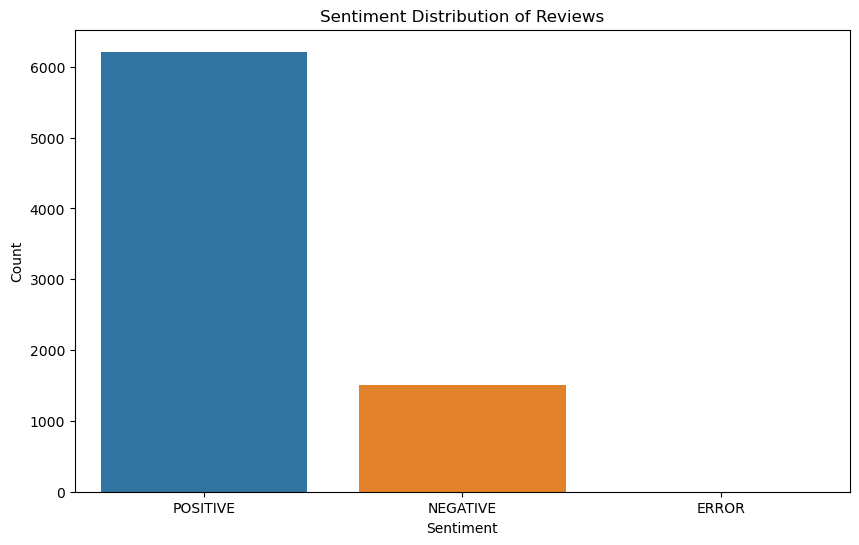

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to recommend products based on sentiment scores
def recommend_products(df, top_n=5):
    try:
        # Group by Product Name and calculate the average sentiment score for each product
        product_sentiment = df.groupby('Product Name').agg({'Sentiment_Score': 'mean'}).reset_index()
        
        # Sort products by the average sentiment score in descending order
        recommended_products = product_sentiment.sort_values(by='Sentiment_Score', ascending=False).head(top_n)
        
        print("Top recommended products based on sentiment analysis:")
        print(recommended_products)
        return recommended_products
    except Exception as e:
        print(f"Error in recommending products: {e}")
        return None

# Function to visualize sentiment distribution
def visualize_sentiment_distribution(df):
    try:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Sentiment_Label')
        plt.title('Sentiment Distribution of Reviews')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.show()
    except Exception as e:
        print(f"Error in visualizing sentiment distribution: {e}")

# Example usage:
if __name__ == "__main__":
    csv_file_path = '/Users/ptsaravanan/reviews_with_sentiment.csv'  # Replace with your actual CSV file path

    # Load the DataFrame with sentiment analysis results
    try:
        df_with_sentiment = pd.read_csv(csv_file_path)
        
        # Recommend top 5 products
        top_products = recommend_products(df_with_sentiment, top_n=5)
        
        # Save the recommended products to CSV
        if top_products is not None:
            top_products.to_csv('top_recommended_products.csv', index=False)
            print("Top recommended products saved to 'top_recommended_products.csv'.")

        # Visualize sentiment distribution
        visualize_sentiment_distribution(df_with_sentiment)
    except Exception as e:
        print(f"Error processing the CSV file: {e}")
